This notebook has the results of my May Tabular Playground Series entries, the models, their details, and a summary of the findings. . 

I trained around 20-25 models, with slight variations and differences in some parameters and hyperparameters. 

The core models I trained are

1. FastAI Tabular Methods Random Forest (Good baseline)
2. FastAI Tabular Neural Network (Pretty good results, surprisingly)
3. LightAutoML (This gave me the best results, and was simple to use)
4. Catboost
5. Scikit-learn Voting Ensemble of Random Forest and Extra Trees (Pretty good)
6. Scikit-learn Random Forest and Extra Trees single classifier ensemble

Three feature engineering / Data preperation approaches

1. Use the data as is -- this is what gave the best results, despite the class imbalance
2. Use SMOTE alone (Overall worst results) and SMOTE-Tomek resampling (comparable to unchanged).
3. Zero-removal by adding 1 to the whole dataset (like a constant) and then resampling (SMOTOMEK). I did this because one of the EDA notebooks pointed out how sparse the data was and that got me wondering if it mattered. Overall, I dont think it really did. This was computationally much heavier but didnt really give better results as far as I can tell.

So tried out each of those 6 models with these datasets but am posting only the most interesting findings. I dont really know how to plot things properly on this notebook, so the images are screenshots of the various experiments I ran and then ensembled in GIMP :). 

Users and Notebooks that Helped me:

1. @alexryzhkov LightAutoML Baseline TPS https://www.kaggle.com/alexryzhkov/lightautoml-baseline-tps-may-2021 plus i asked a bunch of questions on the notebook and he answered all of them. I loved using this library
2. @remekkinas Sparsity-Shap EDA https://www.kaggle.com/remekkinas/tps5-is-about-sparsity-shap-extensive
3. @subinium Categoriacal EDA https://www.kaggle.com/subinium/tps-may-categorical-eda Disovering the UMAP plots on this notebook was eye opening! This gives me a new tool for my EDA/visualization toolkit. 


## Performance

Scikit-learn Voting Ensemble of Random Forest and Extra Trees on un-resampled data

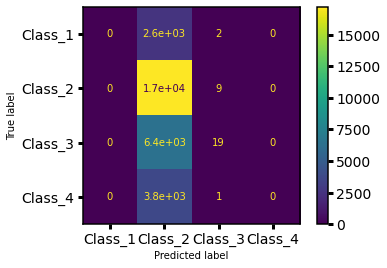 

Scikit-Learn Random forest n_estimators=500 on SMOTOMEK resampled data. 
This looks like it's over fitting.

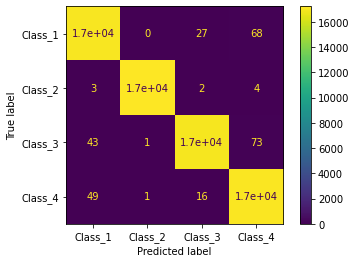


FastAI Tabular NN after 100 epochs of Fit_one_cycle 

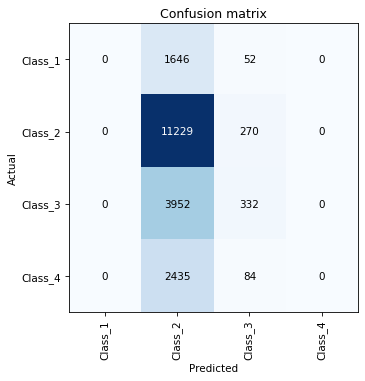!
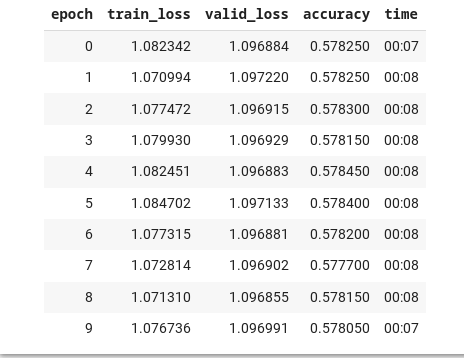
Despite the fact that error, score, accuracy etc. just slightly over 50%, on submission this gave a pretty good score. I will wait to see if this stays so after the competition ends.This indicatest that this model generalizes better than others.

## Comparisong of Test Predictions of the various models

Comparison of the predictions -- All the modes are largely just predicting category two.

model code   
`pred_lama_1.describe().style.background_gradient(axis=1,
                 cmap=sns.light_palette('green', as_cmap=True))`

`

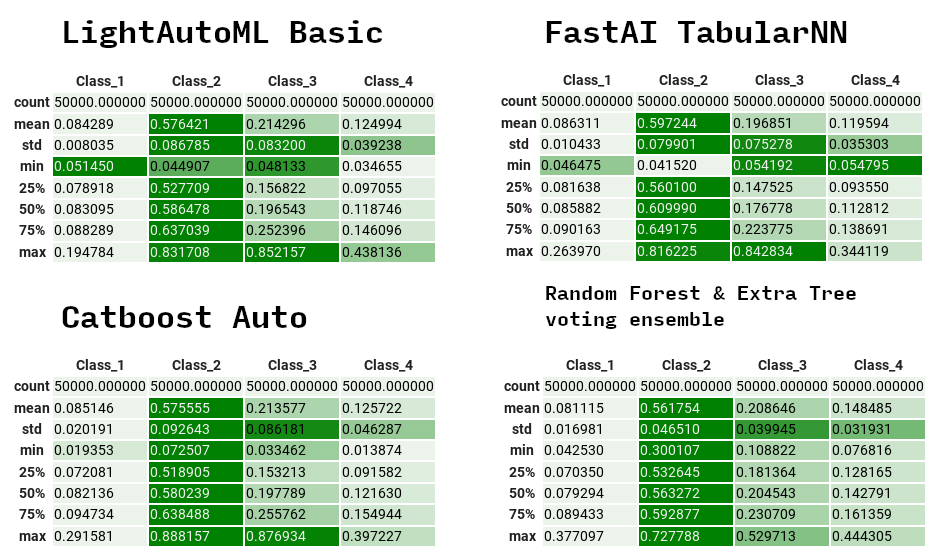

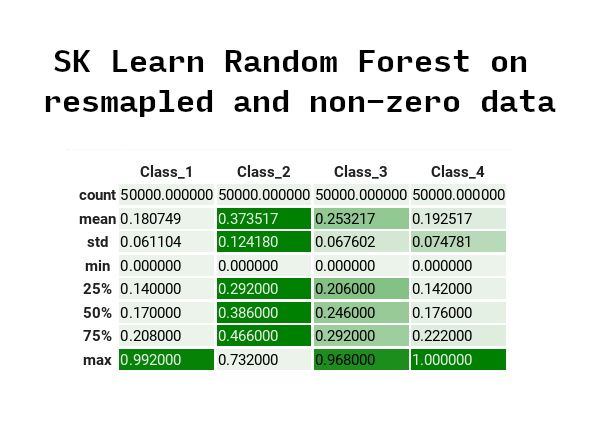

This, on the otherhand looks VERY different, but still continues to vote largely for class_2

Here are some random row values from the predictions, there's a good amount of similarity between all the models. 

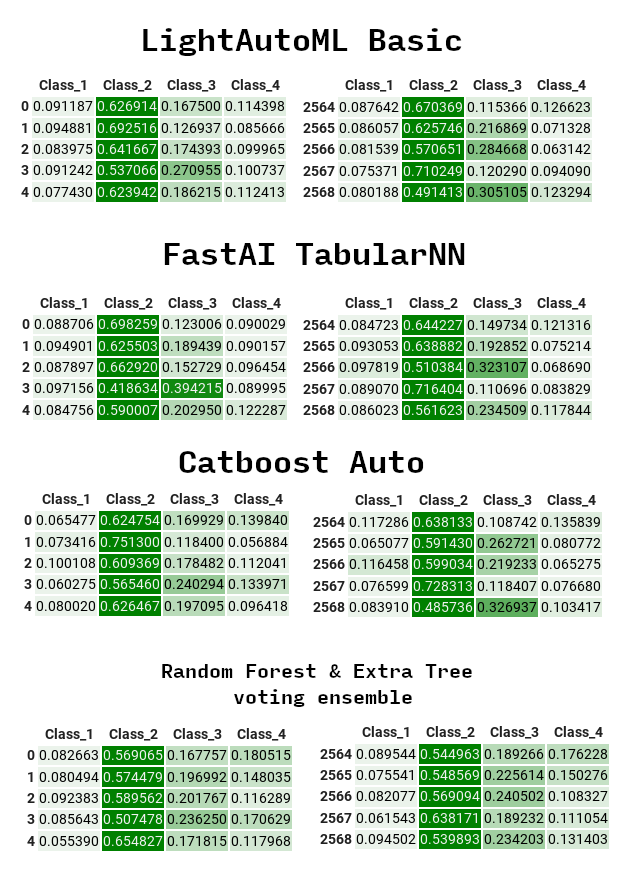

 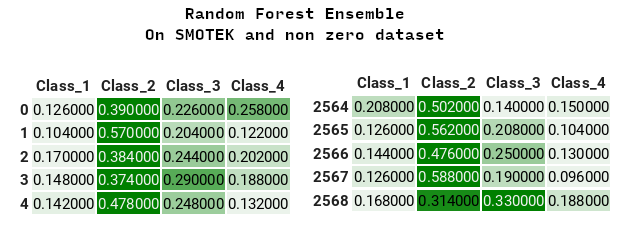


 The confidence with which it is voting for class_2 has come down.


## Feature Importance Comparisons

Feature importance of the LightAutoML model unresampled data


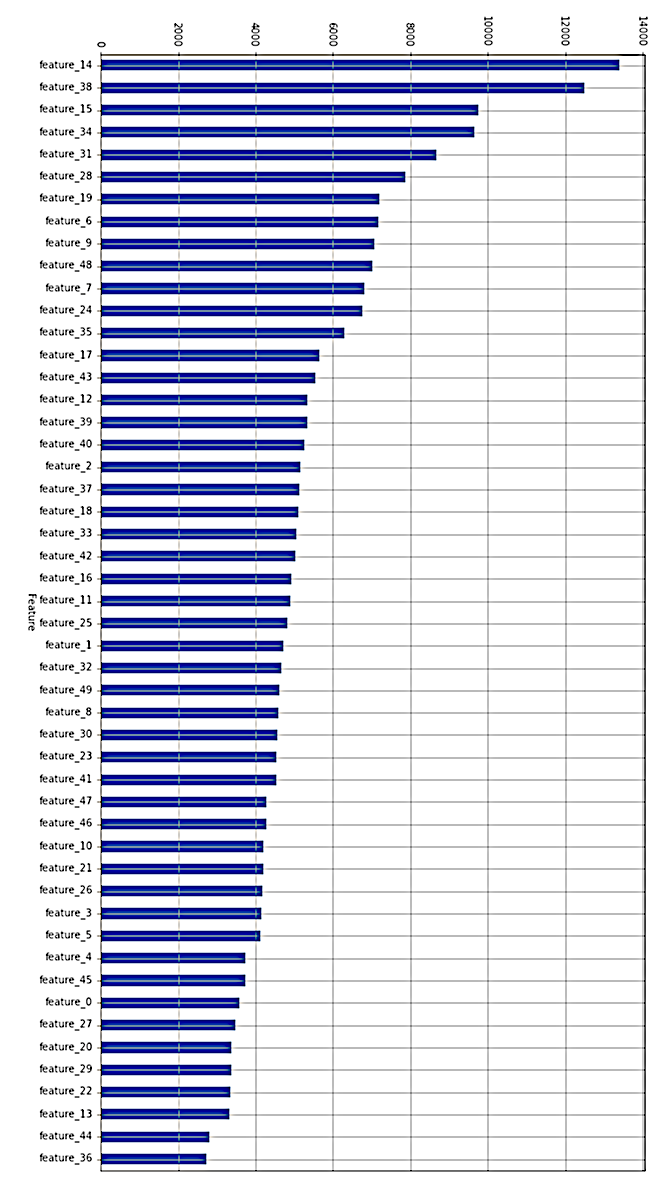

Feature importance of the Random Forest ensemble trained on resampled data
Surprisingly like the LAMA results


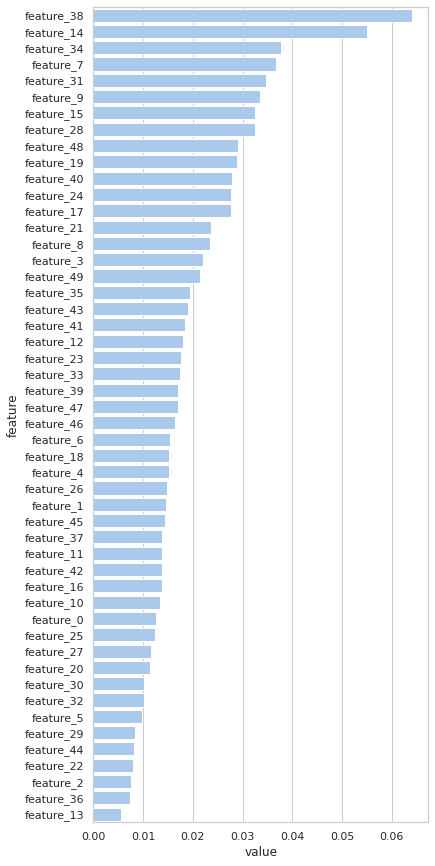 

## Comparison of Public /Partial Scores

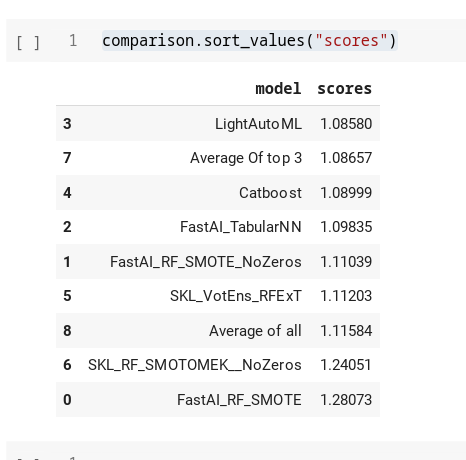

I tried the No-zeros and various permutions of smotek and smote with other models, but they all did much worse and so I am not including them in the comparison. These are at present the best models


## Comparison of the UMAPS of the different train and test sets

I Loved this mapping which I found in 

In [ ]:
from cycler import cycler


raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

raw_dark_palette = [
    (10, 132, 255), # Blue
    (255, 159, 10), # Orange
    (48, 209, 88),  # Green
    (255, 69, 58),  # Red
    (191, 90, 242), # Purple
    (94, 92, 230),  # Indigo
    (255, 55, 95),  # Pink
    (100, 210, 255),# Teal
    (255, 214, 10)  # Yellow
]

raw_gray_light_palette = [
    (142, 142, 147),# Gray
    (174, 174, 178),# Gray (2)
    (199, 199, 204),# Gray (3)
    (209, 209, 214),# Gray (4)
    (229, 229, 234),# Gray (5)
    (242, 242, 247),# Gray (6)
]

raw_gray_dark_palette = [
    (142, 142, 147),# Gray
    (99, 99, 102),  # Gray (2)
    (72, 72, 74),   # Gray (3)
    (58, 58, 60),   # Gray (4)
    (44, 44, 46),   # Gray (5)
    (28, 28, 39),   # Gray (6)
]


light_palette = np.array(raw_light_palette)/255
dark_palette = np.array(raw_dark_palette)/255
gray_light_palette = np.array(raw_gray_light_palette)/255
gray_dark_palette = np.array(raw_gray_dark_palette)/255

mpl.rcParams['axes.prop_cycle'] = cycler('color',dark_palette)
mpl.rcParams['figure.facecolor']  = gray_dark_palette[-2]
mpl.rcParams['figure.edgecolor']  = gray_dark_palette[-2]
mpl.rcParams['axes.facecolor'] =  gray_dark_palette[-2]

white_color = gray_light_palette[-2]
mpl.rcParams['text.color'] = white_color
mpl.rcParams['axes.labelcolor'] = white_color
mpl.rcParams['axes.edgecolor'] = white_color
mpl.rcParams['xtick.color'] = white_color
mpl.rcParams['ytick.color'] = white_color

mpl.rcParams['figure.dpi'] = 200

mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

In [ ]:
sns.palplot(dark_palette)

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as pltreducer  
import seaborn as sns
from umap 

### UMAP of Original Train Set

In [ ]:
train= pd.read_csv('../input/tabular-playground-series-may-2021/train.csv')
train = train.drop('id', axis=1)
train[:2]

In [ ]:
train_sub = train.sample(10000, random_state=0)


In [ ]:
# Import label encoder 
from sklearn import preprocessing 
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
# Encode labels in column 'Species'. 
train_sub['target']= label_encoder.fit_transform(train_sub['target']) 
train_sub['target'].unique()
target = train_sub['target']


In [ ]:
dr = umap.fit_transform(train_sub.iloc[:,:-1], target)

In [ ]:
fig = plt.figure(figsize=(12, 12))
gs = fig.add_gridspec(5, 4)
ax = fig.add_subplot(gs[:-1,:])

sub_axes = [None] * 4
for idx in range(4): 
    sub_axes[idx] = fig.add_subplot(gs[-1,idx])

for idx in range(4):
    ax.scatter(x=dr[:,0][target==idx], y=dr[:,1][target==idx],
              s=10, alpha=0.2
              )

    for j in range(4):
        sub_axes[j].scatter(x=dr[:,0][target==idx], y=dr[:,1][target==idx],
                              s=10, alpha = 0.4 if idx==j else 0.008, color = (dark_palette[j%9]) if idx==j else white_color,
                            zorder=(idx==j)
                           )
        
    
    sub_axes[idx].set_xticks([])
    sub_axes[idx].set_yticks([])
    sub_axes[idx].set_xlabel('')
    sub_axes[idx].set_ylabel('')
    sub_axes[idx].set_title(f'Class_{idx+1}')
    sub_axes[idx].spines['right'].set_visible(True)
    sub_axes[idx].spines['top'].set_visible(True)

ax.set_title('Dimenstion Reduction (UMAP) of Original Test Set', fontweight='bold', fontfamily='serif', fontsize=20, loc='left')   
    
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

fig.tight_layout()
plt.show()

## UMAP of the SMOTE resized training set

This set looks pretty weird.like a brain

In [ ]:
train_res= pd.read_csv('../input/resampled-traincsv/resampled_train.csv')
train_res.shape


In [ ]:
 train_res_sub = train_res.sample(22998, random_state=0)


In [ ]:
# Import label encoder 
from sklearn import preprocessing 
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
# Encode labels in column 'target'. 
train_res_sub['target']= label_encoder.fit_transform(train_res_sub['target']) 
train_res_sub['target'].unique()
target = train_res_sub['target']


In [ ]:
dr_r = umap.fit_transform(train_res_sub.iloc[:,:-1], target)

In [ ]:
fig = plt.figure(figsize=(12, 12))
gs = fig.add_gridspec(5, 4)
ax = fig.add_subplot(gs[:-1,:])

sub_axes = [None] * 4
for idx in range(4): 
    sub_axes[idx] = fig.add_subplot(gs[-1,idx])

for idx in range(4):
    ax.scatter(x=dr_r[:,0][target==idx], y=dr_r[:,1][target==idx],
              s=10, alpha=0.2
              )

    for j in range(4):
        sub_axes[j].scatter(x=dr_r[:,0][target==idx], y=dr_r[:,1][target==idx],
                              s=10, alpha = 0.4 if idx==j else 0.008, color = (dark_palette[j%9]) if idx==j else white_color,
                            zorder=(idx==j)
                           )
        
    
    sub_axes[idx].set_xticks([])
    sub_axes[idx].set_yticks([])
    sub_axes[idx].set_xlabel('')
    sub_axes[idx].set_ylabel('')
    sub_axes[idx].set_title(f'Class_{idx+1}')
    sub_axes[idx].spines['right'].set_visible(True)
    sub_axes[idx].spines['top'].set_visible(True)

ax.set_title('Dimenstion Reduction (UMAP) of SMOTE Set', fontweight='bold', fontfamily='serif', fontsize=20, loc='left')   
    
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

fig.tight_layout()
plt.show()

### SMOTE TOMEK

This looks a lot more like the original dataset

In [ ]:
train_smotek= pd.read_csv('../input/smotetomek/smotek_resampled_train(1).csv')
train_res.shape

In [ ]:
 train_smotek_sub = train_smotek.sample(22998, random_state=34)

In [ ]:
# Import label encoder 
from sklearn import preprocessing 
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
# Encode labels in column 'target'. 
train_smotek_sub['target']= label_encoder.fit_transform(train_smotek_sub['target']) 
train_smotek_sub['target'].unique()
target = train_smotek_sub['target']


In [ ]:
dr_rs = umap.fit_transform(train_smotek_sub.iloc[:,:-1], target)

In [ ]:
fig = plt.figure(figsize=(12, 12))
gs = fig.add_gridspec(5, 4)
ax = fig.add_subplot(gs[:-1,:])

sub_axes = [None] * 4
for idx in range(4): 
    sub_axes[idx] = fig.add_subplot(gs[-1,idx])

for idx in range(4):
    ax.scatter(x=dr_rs[:,0][target==idx], y=dr_rs[:,1][target==idx],
              s=10, alpha=0.2
              )

    for j in range(4):
        sub_axes[j].scatter(x=dr_rs[:,0][target==idx], y=dr_rs[:,1][target==idx],
                              s=10, alpha = 0.4 if idx==j else 0.008, color = (dark_palette[j%9]) if idx==j else white_color,
                            zorder=(idx==j)
                           )
        
    
    sub_axes[idx].set_xticks([])
    sub_axes[idx].set_yticks([])
    sub_axes[idx].set_xlabel('')
    sub_axes[idx].set_ylabel('')
    sub_axes[idx].set_title(f'Class_{idx+1}')
    sub_axes[idx].spines['right'].set_visible(True)
    sub_axes[idx].spines['top'].set_visible(True)

ax.set_title('Dimenstion Reduction (UMAP) of SMOTE-TOMEK resampled MAY TPS', fontweight='bold', fontfamily='serif', fontsize=20, loc='left')   
    
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

fig.tight_layout()
plt.show()